In [16]:
import numpy as np
import pandas as pd

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [25]:
df = pd.read_csv(r"C:\Users\acer pc\OneDrive\Desktop\data.csv")

In [26]:
df.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,g0l1o6,[OC] Website about covid-19 pandemic stats wit...,1,muddymind,NaN,moderator,0.0,[],1586791506,https://www.reddit.com/r/dataisbeautiful/comme...,3,False
1,g0kxzc,Dynamic timeline of the founding of major Euro...,1,[deleted],NaN,deleted,0.0,[],1586791184,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,g0kwbp,"Despite more than four weeks to complete it, I...",251,jamaisvu99,OC: 3,NaN,0.0,[],1586791045,https://www.reddit.com/r/dataisbeautiful/comme...,25,False
3,g0ktji,[OC] Reported Coronavirus Tests per million as...,24,AAA786786,OC: 2,NaN,0.0,[],1586790800,https://www.reddit.com/r/dataisbeautiful/comme...,18,False
4,g0kiyr,[OC] House M.D.-IMDB rating of episodes,9,MrButterDucky,OC: 1,moderator,0.0,[],1586789902,https://www.reddit.com/r/dataisbeautiful/comme...,8,False


In [27]:
df.isna().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        151582
removed_by               167068
total_awards_received    140006
awarders                 150681
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

In [28]:
del df['author_flair_text']
del df['removed_by']
del df['total_awards_received']
del df['awarders']
del df['id']

In [29]:
del df['created_utc']
del df['full_link']

In [30]:
df.head()

,title,score,author,num_comments,over_18
0,[OC] Website about covid-19 pandemic stats wit...,1,muddymind,3,False
1,Dynamic timeline of the founding of major Euro...,1,[deleted],0,False
2,"Despite more than four weeks to complete it, I...",251,jamaisvu99,25,False
3,[OC] Reported Coronavirus Tests per million as...,24,AAA786786,18,False
4,[OC] House M.D.-IMDB rating of episodes,9,MrButterDucky,8,False


In [31]:
df.title.fillna(" ",inplace = True)

In [32]:
df.title.value_counts()

data_irl                                                  1060
Data_irl                                                   360
裕美･ルミィヤンツェヴァのスライドショー                                       320
Title your visualization but keep the closing tag [OC]     117
Dataviz Open Discussion Thread for /r/dataisbeautiful      103
                                                          ... 
Map of the Population Distribution of New Zealand            1
Services provided by Planned Parenthood, 2006-2013           1
Data on Canada's Aging Inmate Population                     1
Cigarettes I’ve smoked vs. the Eiffel Tower                  1
Race Dot Maps of Australian Cities [OC]                      1
Name: title, Length: 160786, dtype: int64

In [36]:
df['text'] = df['title'] + ' ' + df['author']

del df['title']
del df['author']

In [37]:
df.head()

,score,num_comments,over_18,text
0,1,3,False,[OC] Website about covid-19 pandemic stats wit...
1,1,0,False,Dynamic timeline of the founding of major Euro...
2,251,25,False,"Despite more than four weeks to complete it, I..."
3,24,18,False,[OC] Reported Coronavirus Tests per million as...
4,9,8,False,[OC] House M.D.-IMDB rating of episodes MrButt...


In [38]:
df.over_18.replace(True, 1, inplace= True)

In [39]:
df.over_18.replace(False,0,inplace = True)

In [40]:
x = df[:100000]
train_false = x[x.over_18 == 0.0].text
train_true = x[x.over_18 == 1.0].text
train_text = df.text.values[:100000]
test_text = df.text.values[100000:]
train_category = df.over_18[:100000]
test_category = df.over_18[100000:]

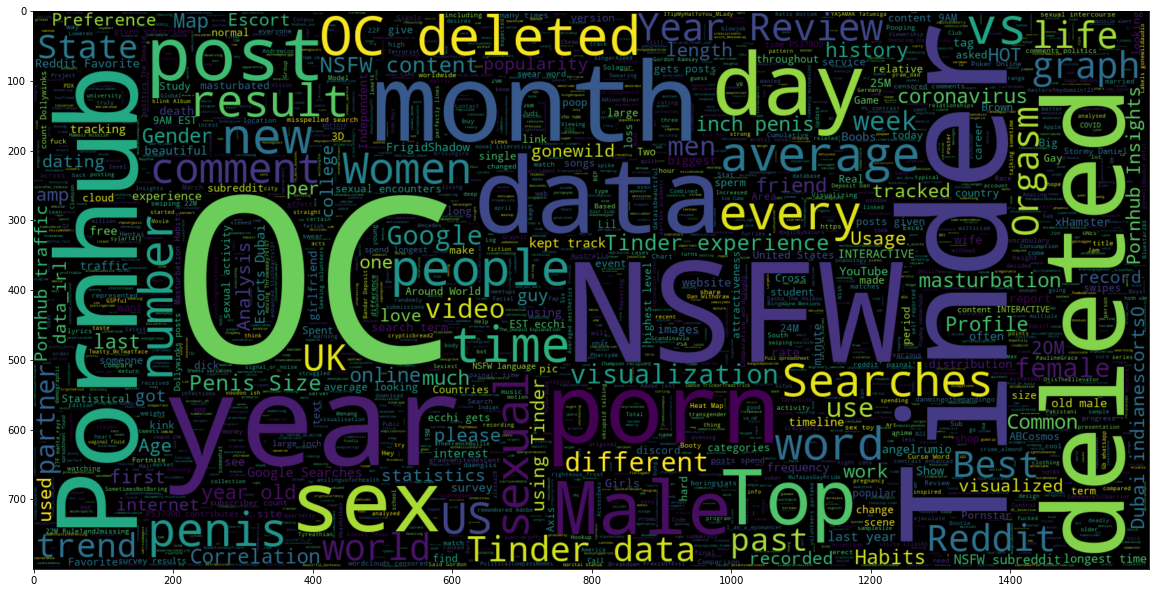

In [41]:
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(train_true)))
plt.imshow(wc,interpolation = 'bilinear')

In [42]:
text_true = wc.process_text(str(" ".join(train_true)))
text_true.keys()

dict_keys(['OC', 'boyfriend', 'tracking', 'sexual', 'past', 'MyTrojanWhore', 'Challenges', 'ahmedsaed01099358176', 'money', 'Heist', 'La', 'Casa', 'de', 'Papel', 'Real', 'Age', 'life', 'ezzobair_dh', 'Global', 'cases', 'coronavirus', 'april', 'LeoFaical', 'number', 'infections', 'country', 'world', 'COVID', 'https', 'fr', 'statista', 'statistiques', 'morts', 'monde', 'hedi_mhb', 'Forecast', 'death', 'toll', 'new', 'York', 'State', 'Apr', 'tavad', 'much', 'Pornhub', 'traffic', 'Increased', 'Due', 'Self', 'Isolation', 'stay', 'using', 'Excel', 'created', 'visualization', 'Tinder', 'grades', 'app', 'yellowbrowntwo2', 'Changing', 'Viewing', 'Habits', 'Based', 'Gender', 'time', 'day', 'Zionland555', 'SENİNLE', 'SENİLE', 'experience', '20M', 'deleted', 'ashrek1', 'vocabulary', 'different', 'flairs', 'PoliticalCompassMemes', 'credit', 'RedditPrawAccount', 'OccAzzO', 'Venuzela', 'Bottom_Text', 'kind', 'speaks', 'TriforceFiction', 'data', 'sebastiancone', 'Fastest', 'Growing', 'Combined', 'Stat

In [43]:
len(text_true.keys())

2048

In [44]:
ans_true = []
for i in text_true:
    ans_true.append(i[0])
ans_true [:5]

['O', 'b', 't', 's', 'p']

In [45]:
predictions = []
for i in test_text:
    x = i.split()
    for j in x:
        if j in ans_true:
            predictions.append(1)
            break
        else:
            predictions.append(0)
            break
            
len(predictions)

73611

In [46]:
len(test_category)

73611

In [47]:
count = 0
for i in range(len(predictions)):
    test_category = list(test_category)
    if(predictions[i] == int(test_category[i])):
        count += 1
print(count)

70367


In [48]:
accuracy = (count/len(predictions))*100
accuracy

95.59304995177351

In [49]:
print("accuracy ", accuracy, "%")

accuracy  95.59304995177351 %


In [50]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
